In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
z500 = xr.open_mfdataset('./data/2m_temperature_nc/*.nc', combine='by_coords')

In [4]:
z500

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 350640, lat: 32, lon: 64)
Coordinates:
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 3MB 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 3GB dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [5]:
print(z500)

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 350640, lat: 32, lon: 64)
Coordinates:
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 3MB 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 3GB dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...


In [6]:
z500.t2m.values.shape

(350640, 32, 64)

In [13]:
import pandas as pd
import numpy as np

In [18]:
len(z500.time)

350640

In [14]:
datetime_value = z500.time.values[0]

In [15]:
# Extract year, month, date, and time
year = pd.to_datetime(datetime_value).year
month = pd.to_datetime(datetime_value).month
day = pd.to_datetime(datetime_value).day
time = pd.to_datetime(datetime_value).time()

In [16]:
df = pd.DataFrame({
    'Year': [year],
    'Month': [month],
    'Day': [day],
    'Time': [time]
})

In [17]:
df

,Year,Month,Day,Time
0,1979,1,1,00:00:00


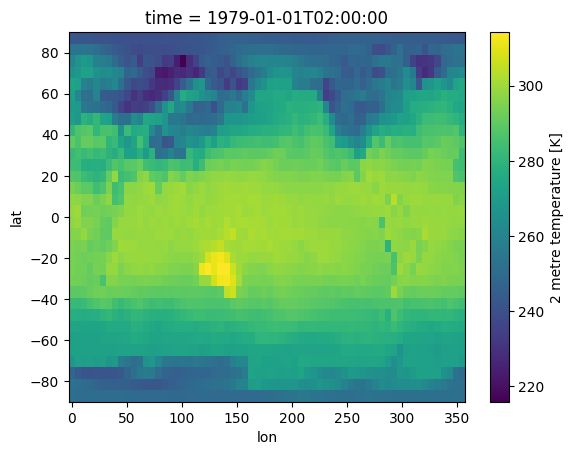

In [14]:
z500.t2m.isel(time=2).plot()

In [17]:
type(z500), type(z500.t2m), type(z500.t2m.isel(time=2))

(xarray.core.dataset.Dataset,
 xarray.core.dataarray.DataArray,
 xarray.core.dataarray.DataArray)

In [28]:
climatology = z500.sel(time=slice('2016', '2016')).load()

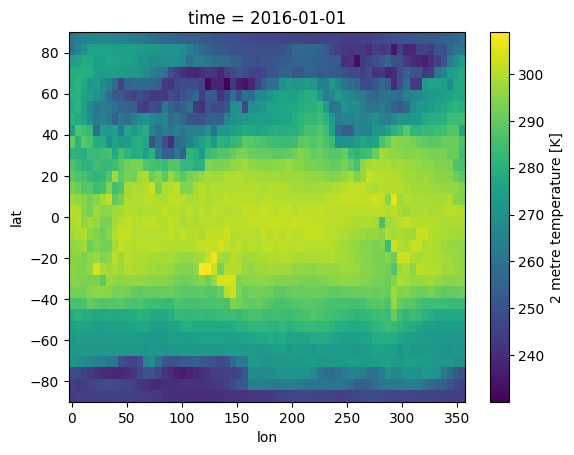

In [31]:
climatology.t2m.isel(time=0).plot()

In [21]:
import numpy as np
numpy_array = z500.t2m.values

In [22]:
numpy_array.shape

(350640, 32, 64)

In [1]:
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
import ast
import torch
import sys

In [3]:
sys.path.append("..")
import yaml

config = yaml.load(open("./config.yaml", "r"),
                   Loader=yaml.FullLoader)

In [4]:
year = config['train_year']

In [11]:
for i in range (year[0], year[1]+1):
    print(i)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


In [9]:
df = pd.read_csv(f"./data/2m_temperature/total.csv")

In [10]:
df.head()

,Year,Month,Day,Time,Timestep
0,1979,1,1,00:00:00,0
1,1979,1,1,01:00:00,1
2,1979,1,1,02:00:00,2
3,1979,1,1,03:00:00,3
4,1979,1,1,04:00:00,4


In [ ]:
data = df[df['Year'] == 2016]

In [12]:
filtered_df = df[(df['Year'] >= year[0]) & (df['Year'] <= year[1])]

In [16]:
sorted_df = filtered_df.sort_values(by=['Timestep'])

In [20]:
total_length = 10

In [34]:
all_clips = []

In [35]:
# for i in range(0, len(sorted_df) - total_length + 1):
for i in range(0, 2):
    slice = sorted_df[i:i + total_length]["Timestep"].values
    all_clips.append(slice)
    print(all_clips)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]
[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]


In [37]:
total_sequence = np.load(f"./data/2m_temperature/total.npy", allow_pickle=True, mmap_mode='r')

In [38]:
slice = sorted_df[0:10]["Timestep"].values

In [39]:
full_sequence = total_sequence[slice]

In [40]:
full_sequence.shape

(10, 32, 64)

In [3]:
import torch

In [6]:
x = torch.randn(3, 128, 128)
patch_h = 16
patch_w = 16

In [7]:
x = x.unfold(1, patch_h, patch_w).unfold(2, patch_h, patch_w)
x.shape

torch.Size([3, 8, 8, 16, 16])

In [6]:
chunk_losses = {'MSE': [31.228405300057087, 31.228229805908377], 'RMSE': [0.11170891921973117, 0.11170860650928313], 'MAE': [0.11139635946503273, 0.11139668872561591], 'SSIM': [0.07490380560601508, 0.06787422760519335], 'PSNR': [-0.01955214367454532, -0.019552134310653075]}

best_losses = {'MSE': [62.452520247609534, 62.45227406522049], 'RMSE': [0.22341016701629843, 0.22340972887324728], 'MAE': [0.22279043849565613, 0.2227908513779747], 'SSIM': [0.2808248673149535, 0.24429513945701342], 'PSNR': [-0.039104049223133173, -0.039104036048354544]}

In [7]:
loss_to_compare = ['MSE', 'MAE', 'RMSE']

for keys in loss_to_compare:
    # Check if both items are smaller
    if chunk_losses[keys][-2] < best_losses[keys][-2] and chunk_losses[keys][-1] < best_losses[keys][-1]:
        # Update both items in best_losses
        best_losses[keys][-2] = chunk_losses[keys][-2]
        best_losses[keys][-1] = chunk_losses[keys][-1]
        print(f"Updated {keys} in best_losses")

Updated MSE in best_losses
Updated MAE in best_losses
Updated RMSE in best_losses
